In [7]:
import os
import sys

import matplotlib.pyplot as plt
from hydra import initialize, compose
from pyHalo.preset_models import CDM
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses import lens_util
from mejiro.plots import plot

In [8]:
lens_dir = os.path.join('/data', 'bwedig', 'roman-population', 'data', 'lenses')
lens_paths = glob(lens_dir + '/*')

In [9]:
lens_list = [lens_util.unpickle_lens(i) for i in lens_paths]

In [10]:
array_list = [i.get_array(num_pix=45, side=5.61) for i in lens_list]

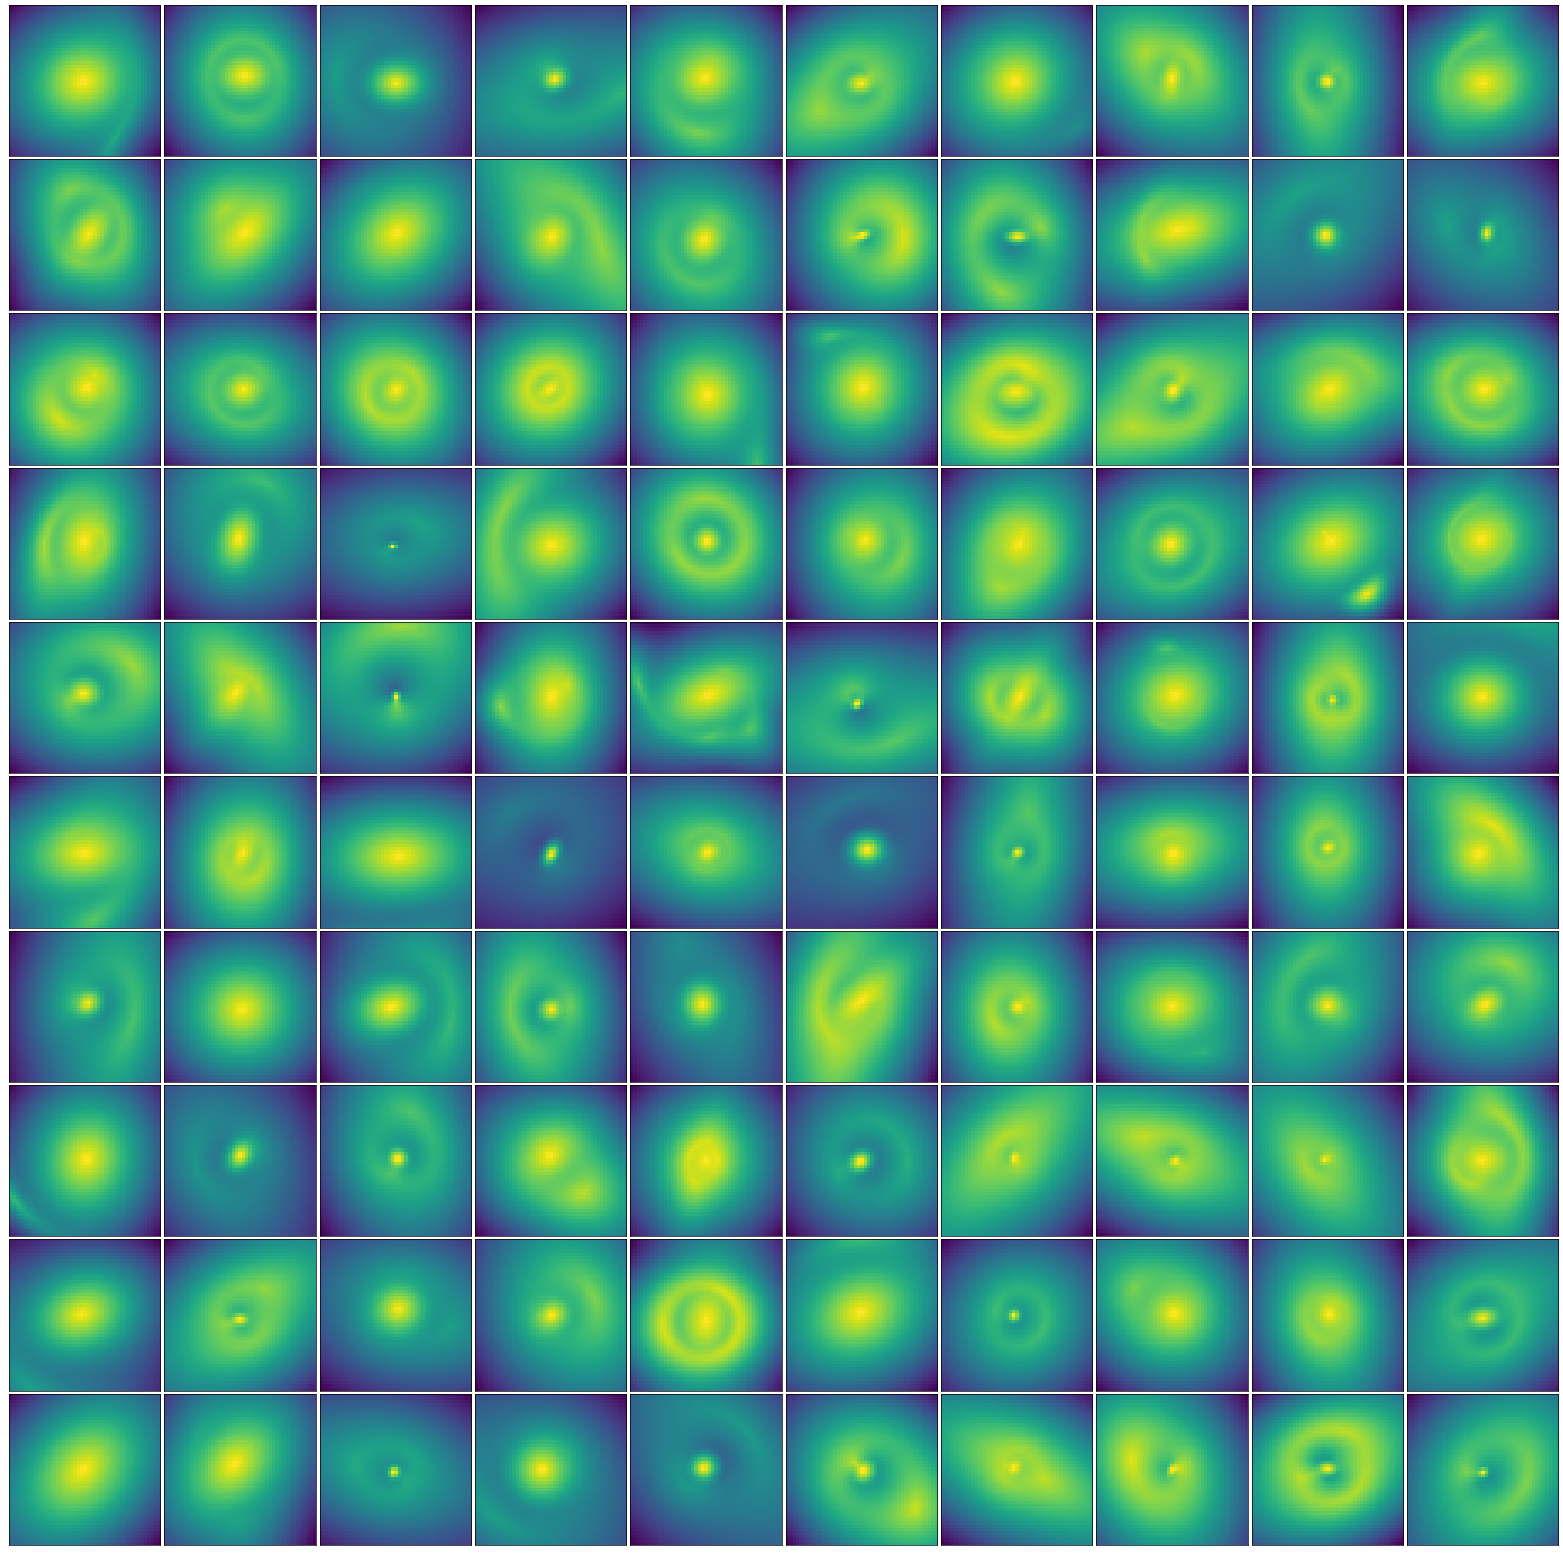

In [12]:
plot.plot_grid(array_list[:100], side=10, log10=True)